In [1]:
import numpy as np
import pandas as pd

red = pd.read_csv("winequality-red.csv")

red.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [2]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

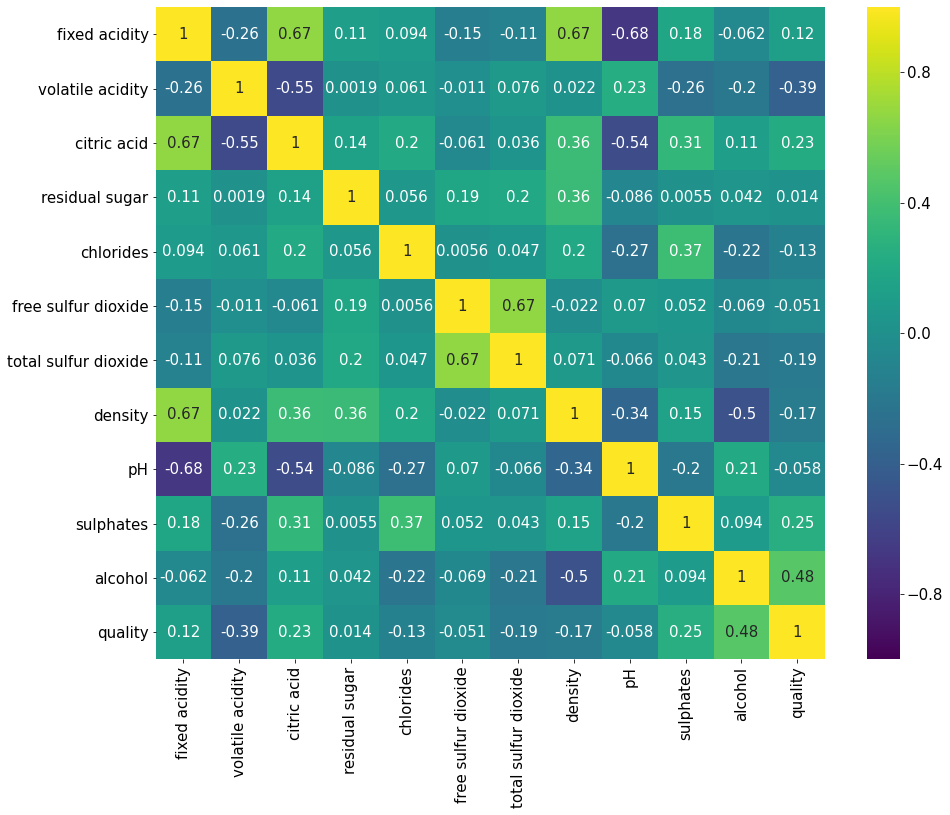

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

corr = red.corr()

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
plt.show()

In [5]:
corr.transpose().loc[:, ["quality"]].sort_values(by="quality",ascending=False)

quality
quality               1.000000
alcohol               0.476166
sulphates             0.251397
citric acid           0.226373
fixed acidity         0.124052
residual sugar        0.013732
free sulfur dioxide  -0.050656
pH                   -0.057731
chlorides            -0.128907
density              -0.174919
total sulfur dioxide -0.185100
volatile acidity     -0.390558

<AxesSubplot:xlabel='quality', ylabel='count'>

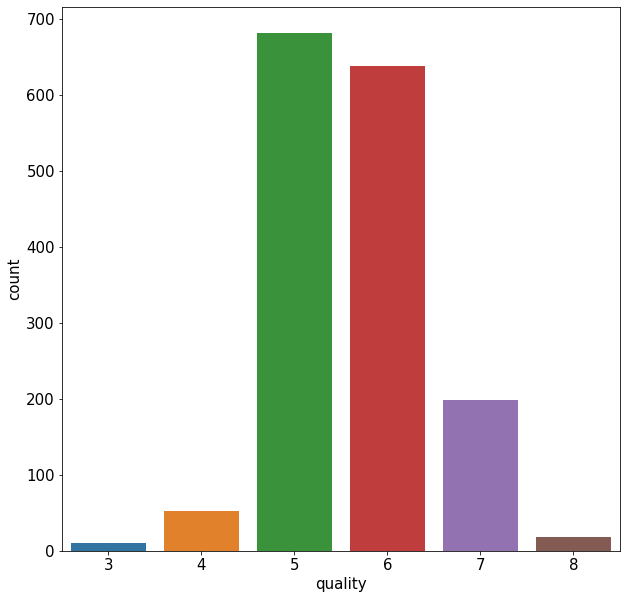

In [6]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.size"] = 15
sns.countplot(x='quality', data=red)

In [7]:
X = red.drop(['quality'], axis=1)
y = red['quality']

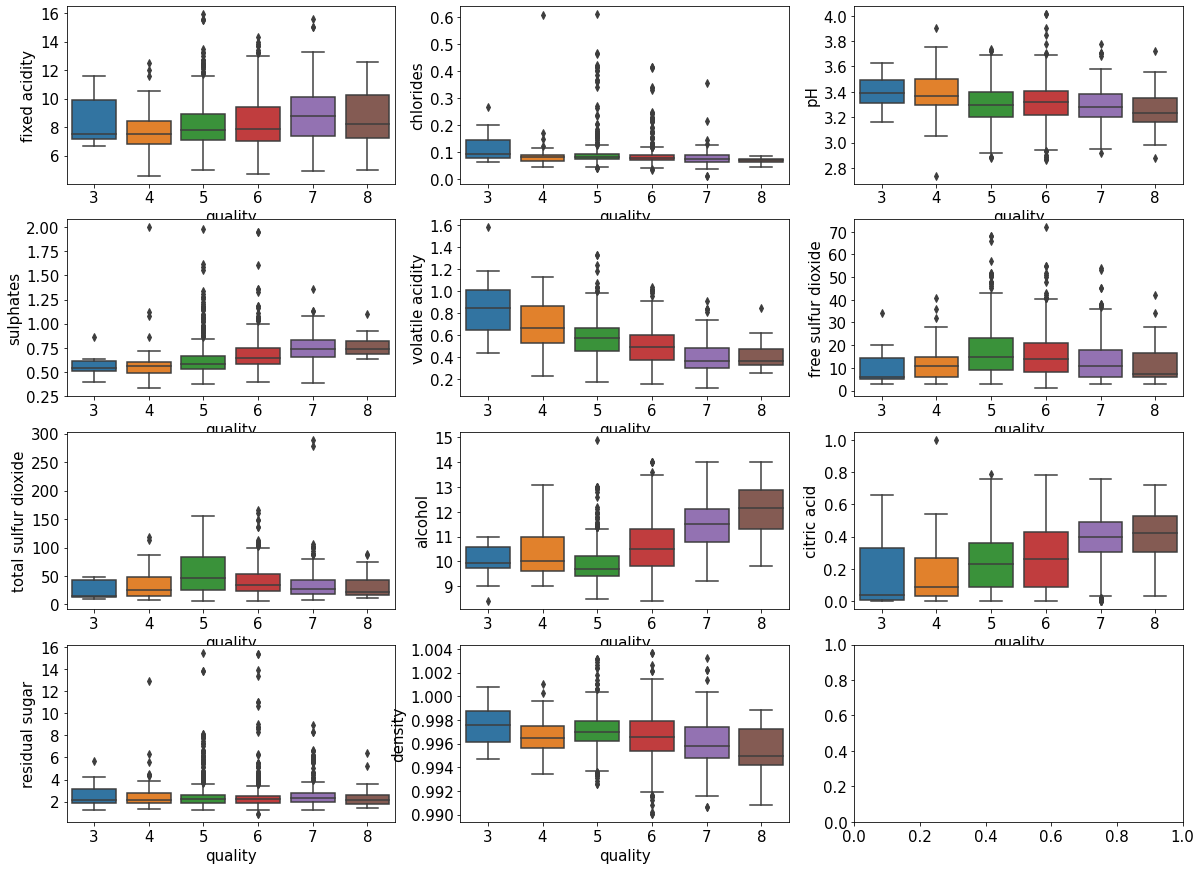

In [8]:
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=red, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

In [10]:
df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality  
0     -0.579207 -0.960246        5  
1      0.128950 -0.584777        5  
2     -0.048089 -0.584777        5  
3     -0.461180 -0.584777        6  
4     -0.579207 -0.960246        5  
...         ...       ...      ...  
1594  -0.461180  0.072294        5  
1595   0.601055  0.729364        6  
1596   0.542042  0.541630        6  
1597   0.305990 -0.209308        5  
1598   0.010924  0.541630        6  

[1599 rows x 12 columns]

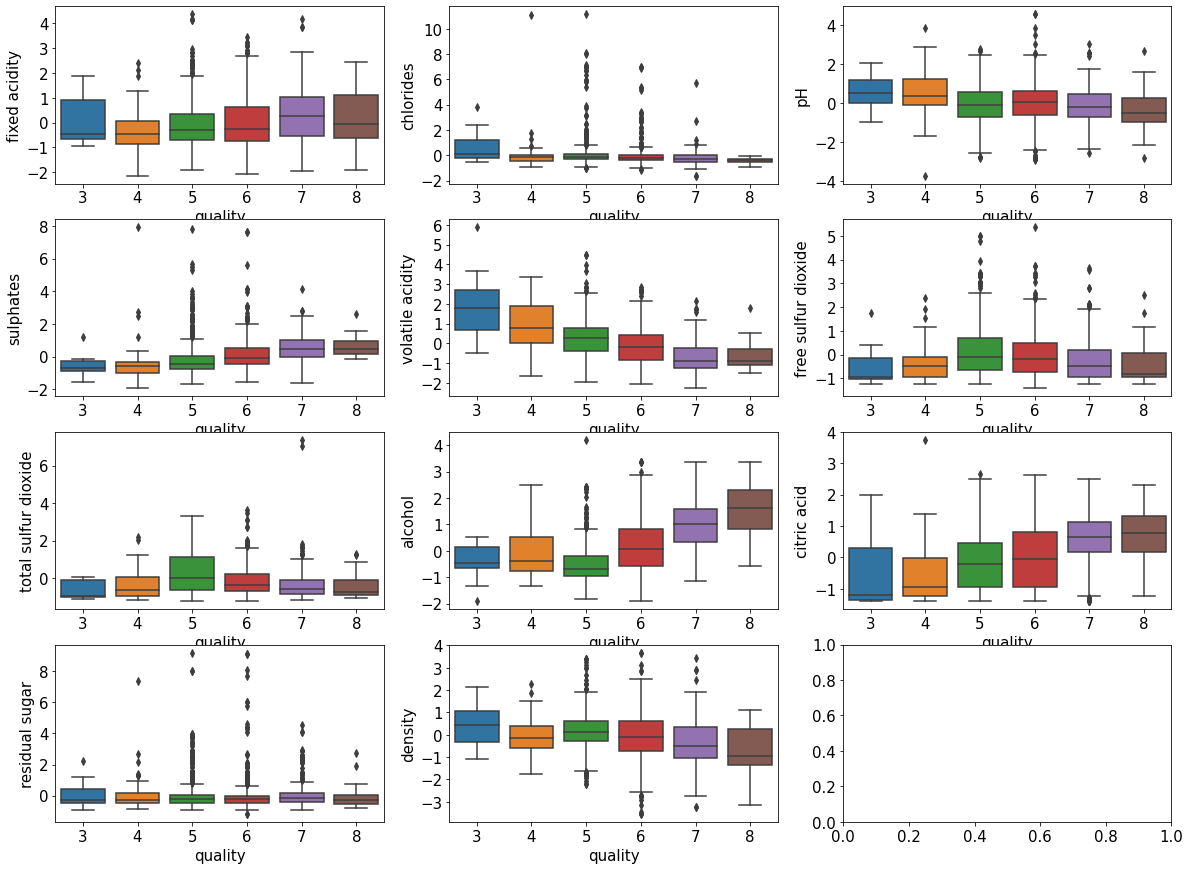

In [11]:
# StandardScaler
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=df_scaled, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

In [12]:
from sklearn.preprocessing import RobustScaler

X = red.drop(['quality'], axis=1)
y = red['quality']

scaler = RobustScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[y.name] = y.values
df_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.238095              0.72    -0.787879       -0.428571      -0.15   
1         -0.047619              1.44    -0.787879        0.571429       0.95   
2         -0.047619              0.96    -0.666667        0.142857       0.65   
3          1.571429             -0.96     0.909091       -0.428571      -0.20   
4         -0.238095              0.72    -0.787879       -0.428571      -0.15   
...             ...               ...          ...             ...        ...   
1594      -0.809524              0.32    -0.545455       -0.285714       0.55   
1595      -0.952381              0.12    -0.484848        0.000000      -0.85   
1596      -0.761905             -0.04    -0.393939        0.142857      -0.15   
1597      -0.952381              0.50    -0.424242       -0.285714      -0.20   
1598      -0.904762             -0.84     0.636364        2.000000      -0.60   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.214286                -0.100  0.469799  1.052632   
1                0.785714                 0.725  0.022371 -0.578947   
2                0.071429                 0.400  0.111857 -0.263158   
3                0.214286                 0.550  0.559284 -0.789474   
4               -0.214286                -0.100  0.469799  1.052632   
...                   ...                   ...       ...       ...   
1594             1.285714                 0.150 -0.827740  0.736842   
1595             1.785714                 0.325 -0.729306  1.105263   
1596             1.071429                 0.050 -0.451902  0.578947   
1597             1.285714                 0.150 -0.572707  1.368421   
1598             0.285714                 0.100 -0.563758  0.421053   

      sulphates  alcohol  quality  
0     -0.333333  -0.5000        5  
1      0.333333  -0.2500        5  
2      0.166667  -0.2500        5  
3     -0.222222  -0.2500        6  
4     -0.333333  -0.5000        5  
...         ...      ...      ...  
1594  -0.222222   0.1875        5  
1595   0.777778   0.6250        6  
1596   0.722222   0.5000        6  
1597   0.500000   0.0000        5  
1598   0.222222   0.5000        6  

[1599 rows x 12 columns]

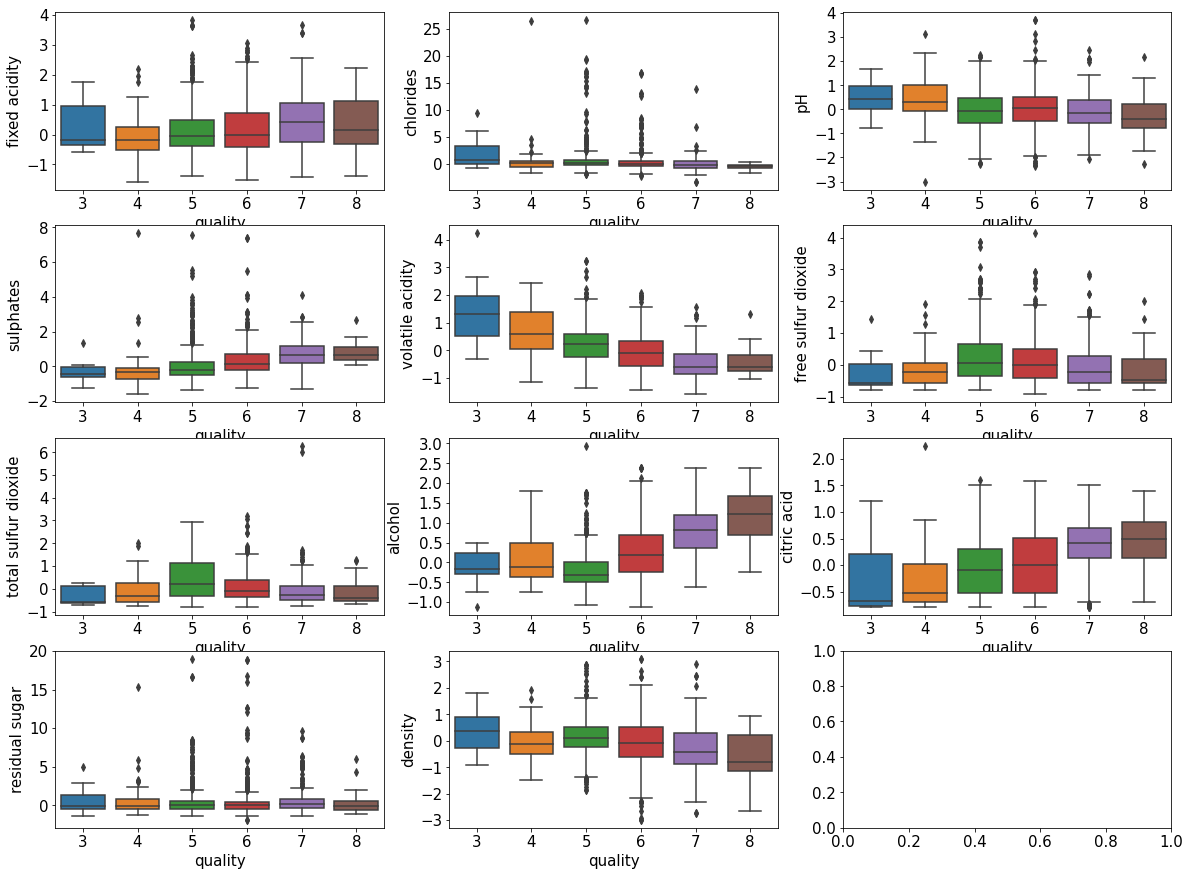

In [13]:
#RobustScaler
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    sns.boxplot(x='quality', y=col, data=df_scaled, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

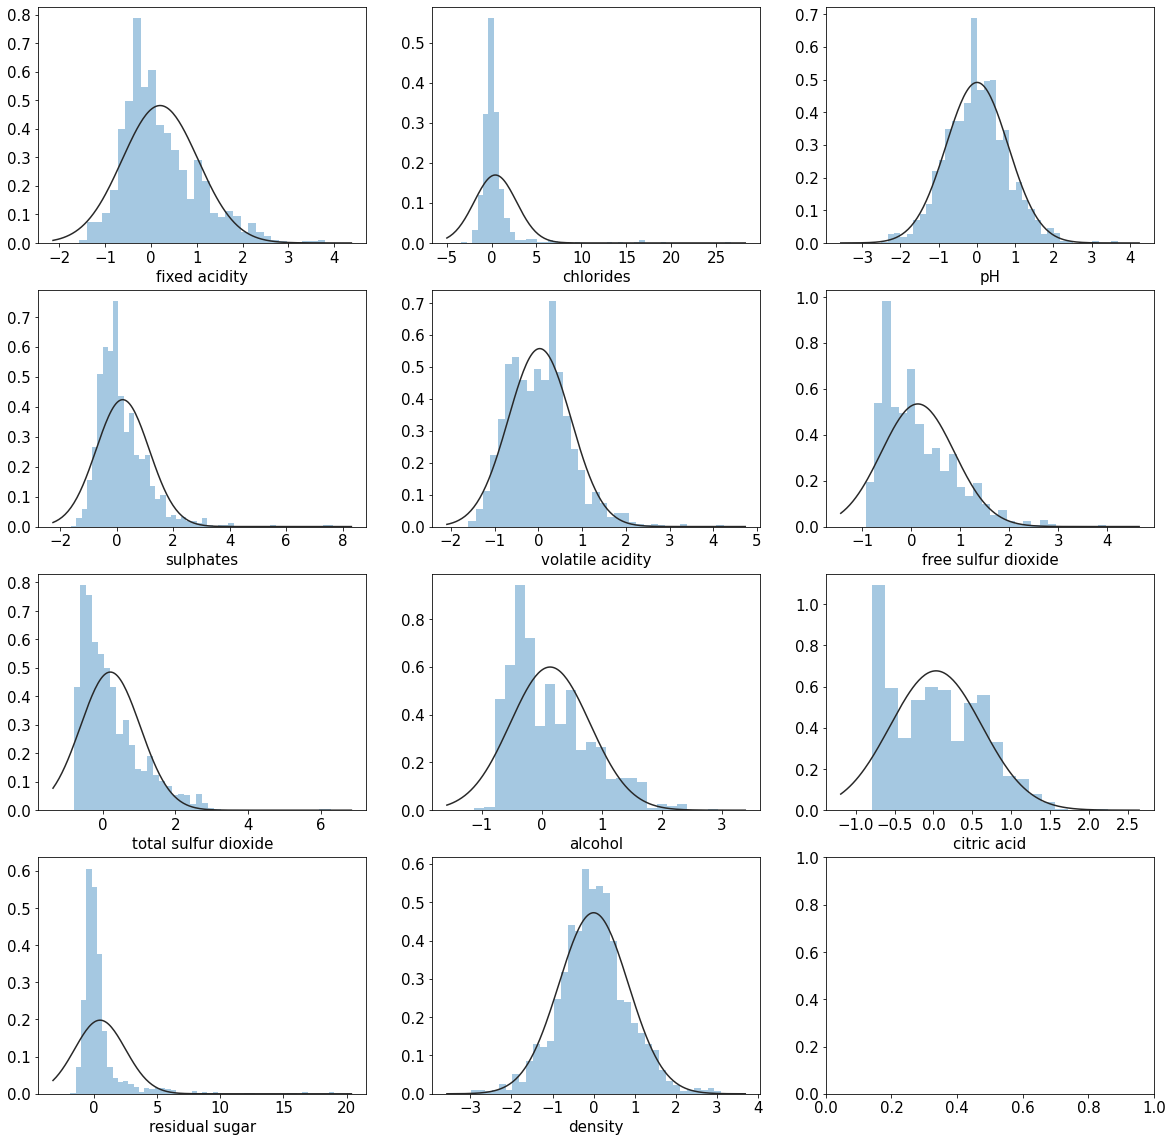

In [14]:
import scipy as sp

plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 15

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=3, nrows=4)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 4
    ax_y = idx % 3
    data = df_scaled[col].values
    sns.distplot(data, kde=False, rug=False, fit=sp.stats.norm, ax=ax[ax_x][ax_y], axlabel=col)
    ax_x += 1

plt.show()